<img src = '../../sb_tight.png'>
<h1 align = 'center'> Capstone Project 2: Pump It Up </h1>

---

### Notebook 2: EDA (Exploratory Data Analysis)
**Author:<br>
Tashi T. Gurung**<br>
**hseb.tashi@gmail.com**

### About the project:
The **objective** of this project is to **predict the failure of water points** spread accross Tanzania before they occur.

There is a huge number of water points mostly pumps (~60K) that provides clean, potable water to communities spread across Tanzania. Compared to other infrastructure projects, water point projects consist of a huge number of inspection points that are geographically spread out. Gathering data on the condition of these pumps has been a challenge. From working with local agencies, to implementing mobile based crowd sourcing projects, none have produced satisfactory results.

The lack of quality data creates a number of problem for a stakeholder like the Tanzanian Government, specifically the Ministry of Water. Consequences include not only higher maintainence costs, but also all the problems and nuanced issues faced by communities when their access to water is compromised or threatened.

While better data collection infrastructure should be built overtime, this project (with its model(s), various analysis, and insights) will be key for efficient resource allocation to maximize the number of people and communities with access to water.
In the long run, it will assist stake holders in and project planning, and even local, regional and national level policy formation. 

### About the notebook:
We imported the dataset produced by the '1.Data Wrangling.ipynb' notebook.\
We will perform EDA to better understand the data.\
To look at the relationship between variables.\
We will also take a closer look at missing values including spotting patterns.

---

# Import libraries and datasets

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/interim/df.csv')

Since the following columns are categorical variables, and not numbers

In [4]:
# convert datatype of cols from int to str
cols = ['id','region_code','district_code',]
for col in cols:
    df[col] = df[col].astype('str')

---

## EDA
### Distributions: Numerical Columns

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_num =  df.select_dtypes(include=numerics)
df_num.head(2).T

,0,1
amount_tsh,6000.000000,0.000000
gps_height,1390.000000,1399.000000
longitude,34.938093,34.698766
latitude,-9.856322,-2.147466
population,109.000000,280.000000
construction_year,1999.000000,2010.000000


**Summary Statistics**

In [5]:
df_num.describe()

,amount_tsh,gps_height,longitude,latitude,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,30500.000000,2013.000000


columns: ***amount_tsh***

histogram

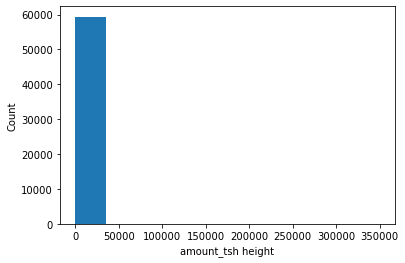

In [19]:
_ = plt.hist(df_num['amount_tsh'])
_ = plt.xlabel('amount_tsh height')
_ = plt.ylabel('Count')
plt.show()

swarmplot

swarmplot is not ideal for our dataset, since we have a huge # of observations i.e. ~ 60K

here, we sampled 100 points from the column: ***amount_tsh*** which is not 0

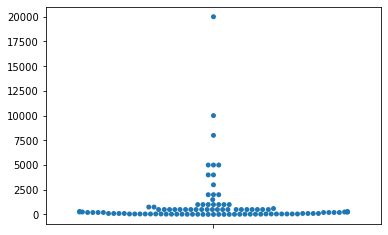

In [35]:
_ = sns.swarmplot(y = np.random.choice(df[df['amount_tsh']!= 0]['amount_tsh'], size = 100))

boxplot after, log2 (at random) transformation not including original data points = 0

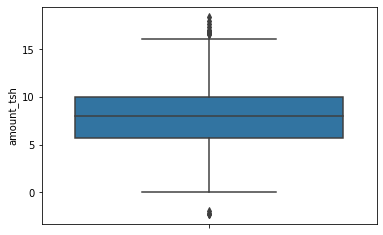

In [50]:
_ = sns.boxplot(y = np.log2(df[df['amount_tsh']!= 0]['amount_tsh']))

In [43]:
def ecdf(col):
    n = len(col)
    x = np.sort(col)
    y = np.arange(1, n+1)/n

    return plt.plot(x, y, marker = '.', linestyle = 'none')

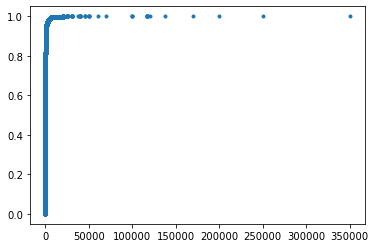

In [44]:
_ = ecdf(df['amount_tsh'])

**Skewness**

The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero. Negative values for the skewness indicate data that are skewed left and positive values for the skewness indicate data that are skewed right.

In [6]:
df_num.skew(axis=None, skipna=None, level=None)

amount_tsh           57.807800
gps_height            0.462402
longitude            -4.191046
latitude             -0.152037
population           12.660714
construction_year    -0.634928
dtype: float64

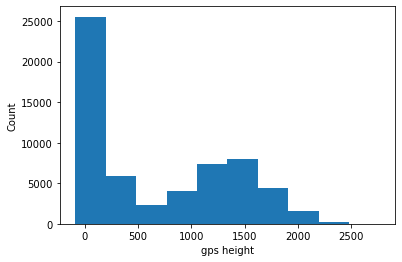

In [14]:
_ = plt.hist(df_num['gps_height'])
_ = plt.xlabel('gps height')
_ = plt.ylabel('Count')
plt.show()

In [ ]:
f, ax = plt.subplots(2,3,figsize=(15,10))
df_num.hist(ax = ax)
plt.show();

Observations:
1. **amount_tsh** is heavly skewed to the right, followed by **population**.
2. Other numeric columns seem fairly normally distributed, coincidently including latitude, (logitude, is almost nomal as well)

To-do:
1. Can use other location variables to check if the 0's in **longitude** to the far left, are errors or not
2. Can also use map data to look at the 4 corners using longitude, and latitude data, and tally it against Tanzania's corners

**amount_tsh**

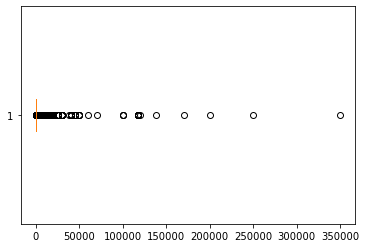

In [72]:
plt.boxplot(data = df, x = 'amount_tsh', vert = False);

# Categorical Data

In [73]:
df_cat = df.select_dtypes(include=object)
pd.concat([df_cat.iloc[0].T,df_cat.nunique()], 
          axis = 1, 
          keys = ['e.g. row1','nunique()'])

,e.g. row1,nunique()
funder,Roman,1897
installer,Roman,2145
wpt_name,none,37400
basin,Lake Nyasa,9
subvillage,Mnyusi B,19287
region,Iringa,21
region_code,11,27
district_code,5,20
lga,Ludewa,125
ward,Mundindi,2092
